In [7]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, urllib, IPython.display, librosa.display
import essentia, essentia.standard as ess
plt.rcParams['figure.figsize'] = (14,4)
# Referência: https://musicinformationretrieval.com/mfcc.html

In [8]:
!pwd

/home/moutinho/Documentos/Trampos/RIMA_AI/rimaai-battle-rap-classificator/battle_rap_classificator/notebooks


In [12]:
# Convertendo audio em uma time-series junto com a sample rate
audio_path = '../resources/audio_samples/22.flac'
x, sr = librosa.load(audio_path)
print(x)
print(sr)

[ 0.0000000e+00 -1.1920929e-07  2.3841858e-07 ... -1.2126696e-01
 -3.5856128e-02  1.0730672e-01]
22050


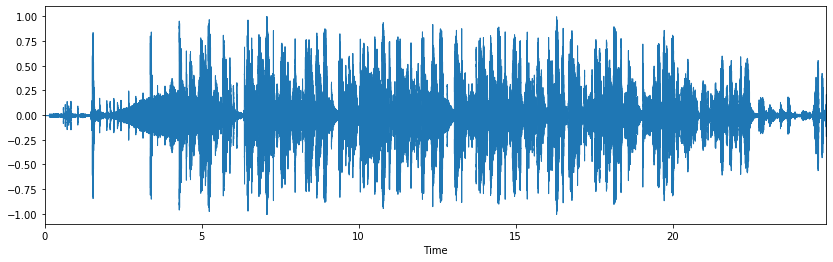

In [13]:
librosa.display.waveplot(x, sr=sr)

In [14]:
# Tocar o audio (pode converter o time series de volta)
IPython.display.Audio(x, rate=sr)

In [16]:
# Extrai features MFCC do audio
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

(20, 1073)


### SIDE NOTE

The very first MFCC, the 0th coefficient, does not convey information relevant to the overall shape of the spectrum. It only conveys a constant offset, i.e. adding a constant value to the entire spectrum. Therefore, many practitioners will discard the first MFCC when performing classification. For now, we will use the MFCCs as is.

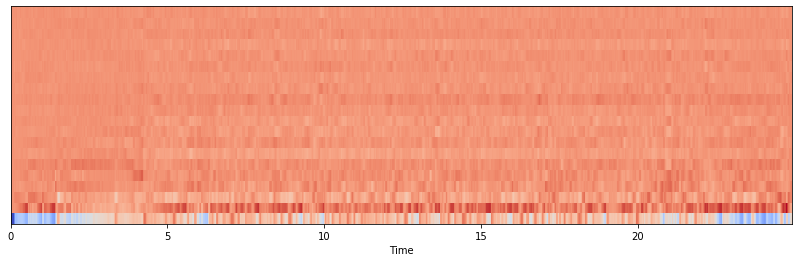

In [17]:
# Display dos mfccs no espectograma
# Link para análise: https://pt.wikipedia.org/wiki/Espectrograma#:~:text=Matematicamente%2C%20representa%2Dse%20o%20espectro,representado%20atrav%C3%A9s%20de%20seu%20espectro.
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [18]:
# MFCCs extraidos a cada janela
print(mfccs)

[[-5.8131903e+02 -5.8131903e+02 -5.8131903e+02 ... -2.6931293e+02
  -1.8637869e+02 -1.6258449e+02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.0237026e+01
  -2.9450966e+01 -4.4647453e+01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.9131779e+01
   2.9779022e+01  2.2867157e+01]
 ...
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1708803e-01
  -1.1353000e+00 -4.4715586e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -8.4307152e-01
   4.3685061e-01 -2.3122683e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.6418097e+00
  -4.1322374e+00 -6.6063962e+00]]


In [20]:
# Feature scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)

# Verifica media e variancia
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[-1.4220680e-08  0.0000000e+00 -7.1103399e-09 -1.4220680e-08
 -3.5551699e-09  7.1103399e-09  2.1331019e-08  7.1103399e-09
  1.0665509e-08 -7.1103399e-09  1.4220680e-08  1.4220680e-08
  3.5551699e-09 -7.1103399e-09  3.5551699e-09  0.0000000e+00
 -1.4220680e-08 -7.1103399e-09 -5.3327547e-09  0.0000000e+00]
[1.        1.0000001 1.        1.        1.        1.0000001 1.
 1.        1.        1.        1.        1.        1.0000001 0.9999999
 1.        1.        1.0000001 0.9999999 1.0000001 1.       ]


/home/moutinho/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/moutinho/.local/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [21]:
# Verifica mfccs pos standarization
print(mfccs)

[[-4.236593   -4.236593   -4.236593   ... -1.2734163  -0.48577544
  -0.25979772]
 [-0.77696115 -0.77696115 -0.77696115 ... -0.37405    -1.3633182
  -1.6658742 ]
 [ 0.75347507  0.75347507  0.75347507 ...  2.1086476   1.5748521
   1.3842063 ]
 ...
 [-0.22172284 -0.22172284 -0.22172284 ... -0.34709042 -0.37692037
  -0.83299285]
 [ 0.17985195  0.17985195  0.17985195 ...  0.05683443  0.2435954
  -0.15754472]
 [ 0.81650573  0.81650573  0.81650573 ...  0.5901773   0.24686445
  -0.09420572]]


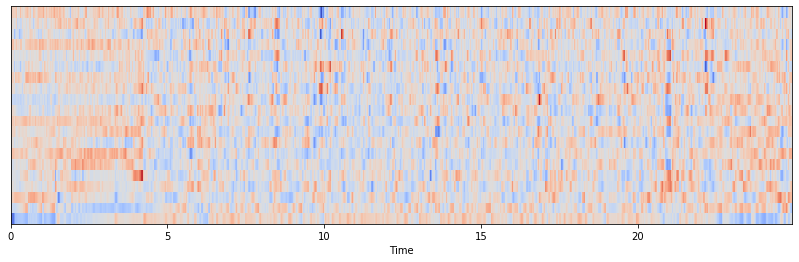

In [22]:
# Display novamente do espectograma
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

### Testando c audio
LInks interessantes: http://monografias.poli.ufrj.br/monografias/monopoli10028032.pdf
https://medium.com/brasil-ai/reconhecimento-voz-python-35a5023767ca